# Load Libraries

In [23]:
import os
import warnings
import logging
import sys
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import dotenv
import pyet
import matplotlib.pyplot as plt
import skill_metrics as sm


dotenv.load_dotenv()
logging.basicConfig(level=logging.INFO)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

# Load Data

In [24]:
FOLDER_PATH = "C:\\Users\\Pooya\\Dropbox\\IRIMO\\Export\\"
monthly_data = pd.read_parquet(path=FOLDER_PATH + "Iran_Monthly_ETo_1951_2025.parquet")
monthly_daily_data = pd.read_parquet(path=FOLDER_PATH + "Iran_Monthly_Daily_ETo_1951_2025.parquet")

# Filter Data

In [25]:
selected_region = "Mazandaran"

monthly_data_selected = monthly_data.query("region_name == @selected_region")\
    .sort_values(by=["region_name", "station_name", "station_id", "year", "month"])\
        .reset_index(drop=True)
monthly_daily_data_selected = monthly_daily_data.query("region_name == @selected_region")\
    .sort_values(by=["region_name", "station_name", "station_id", "year", "month"])\
        .reset_index(drop=True)

In [26]:
monthly_data_selected

,year,month,region_id,region_name,station_id,station_name,lat,lon,station_elevation,tmax,tmax_count,tmin,tmin_count,tm,tm_count,umax,umax_count,umin,umin_count,um,um_count,ffm,ffm_count,sshn,sshn_count,pm,pm_count,p0m,p0m_count,ewm,ewm_count,radglo24,radglo24_count,td_m,td_m_count,twet_m,twet_m_count,tsoil_m,tsoil_m_count,ewsm,ewsm_count,evt,evt_count,rrr24,rrr24_count,date,Penman,Penman-Monteith,ASCE-PM,FAO-56,Priestley-Taylor,Kimberly-Penman,Thom-Oliver,Blaney-Criddle,Hamon,Romanenko,Linacre,Turc,Jensen-Haise,Mcguinness-Bordne,Hargreaves,FAO-24,Abtew,Makkink,Oudin
0,1951,1,MASA,Mazandaran,99361,Alasht,36.07,52.84,1805.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,0.00,0,1951-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,2,MASA,Mazandaran,99361,Alasht,36.07,52.84,1805.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,0.00,0,1951-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1951,3,MASA,Mazandaran,99361,Alasht,36.07,52.84,1805.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,0.00,0,1951-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1951,4,MASA,Mazandaran,99361,Alasht,36.07,52.84,1805.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,0.00,0,1951-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1951,5,MASA,Mazandaran,99361,Alasht,36.07,52.84,1805.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,0.00,0,1951-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,2025,5,MASA,Mazandaran,18332,Tonekabon,36.81,50.90,0.00,23.29,31,16.94,31,20.11,31,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,22.40,31,2025-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.01,147.71,NaN,115.04,NaN,NaN,186.16,110.81,NaN,NaN,NaN,126.64
21524,2025,6,MASA,Mazandaran,18332,Tonekabon,36.81,50.90,0.00,28.14,30,20.48,30,24.31,30,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,20.80,30,2025-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.62,200.37,NaN,151.32,NaN,NaN,220.67,137.29,NaN,NaN,NaN,150.12
21525,2025,7,MASA,Mazandaran,18332,Tonekabon,36.81,50.90,0.00,31.49,25,25.30,27,28.06,24,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,2.60,30,2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.81,253.62,NaN,194.60,NaN,NaN,252.55,136.38,NaN,NaN,NaN,171.81
21526,2025,8,MASA,Mazandaran,18332,Tonekabon,36.81,50.90,0.00,31.90,31,24.66,31,28.28,31,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.00,0,48.50,30,2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.21,226.39,NaN,201.33,NaN,NaN,231.71,135.07,NaN,NaN,NaN,157.63


In [27]:
monthly_daily_data_selected

,region_id,region_name,station_id,station_name,year,month,lat,lon,station_elevation,tmax,tmax_percent,tmin,tmin_percent,tm,tm_percent,umax,umax_percent,umin,umin_percent,um,um_percent,ffm,ffm_percent,sshn,sshn_percent,rrr24,rrr24_percent,pm,pm_percent,p0m,p0m_percent,ewm,ewm_percent,radglo24,radglo24_percent,evt,evt_percent,td_m,td_m_percent,twet_m,twet_m_percent,tsoil_m,tsoil_m_percent,ewsm,ewsm_percent,Penman,Penman_percent,Penman-Monteith,Penman-Monteith_percent,ASCE-PM,ASCE-PM_percent,FAO-56,FAO-56_percent,Priestley-Taylor,Priestley-Taylor_percent,Kimberly-Penman,Kimberly-Penman_percent,Thom-Oliver,Thom-Oliver_percent,Blaney-Criddle,Blaney-Criddle_percent,Hamon,Hamon_percent,Romanenko,Romanenko_percent,Linacre,Linacre_percent,Turc,Turc_percent,Jensen-Haise,Jensen-Haise_percent,Mcguinness-Bordne,Mcguinness-Bordne_percent,Hargreaves,Hargreaves_percent,FAO-24,FAO-24_percent,Abtew,Abtew_percent,Makkink,Makkink_percent,Oudin,Oudin_percent
0,MASA,Mazandaran,99361,Alasht,1951,1,36.07,52.84,1805.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
1,MASA,Mazandaran,99361,Alasht,1951,2,36.07,52.84,1805.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
2,MASA,Mazandaran,99361,Alasht,1951,3,36.07,52.84,1805.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
3,MASA,Mazandaran,99361,Alasht,1951,4,36.07,52.84,1805.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
4,MASA,Mazandaran,99361,Alasht,1951,5,36.07,52.84,1805.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,MASA,Mazandaran,18332,Tonekabon,2025,5,36.81,50.90,0.00,23.29,100.00,16.94,100.00,20.11,100.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,22.40,100.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,116.19,100.00,149.31,100.00,NaN,0.00,116.05,100.00,NaN,0.00,NaN,0.00,186.37,100.00,110.40,100.00,NaN,0.00,NaN,0.00,NaN,0.00,126.79,100.00
21524,MASA,Mazandaran,18332,Tonekabon,2025,6,36.81,50.90,0.00,28.14,100.00,20.48,100.00,24.31,100.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,20.80,100.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,136.25,100.00

In [28]:
df = monthly_daily_data_selected.dropna(subset=["FAO-56"])
df

,region_id,region_name,station_id,station_name,year,month,lat,lon,station_elevation,tmax,tmax_percent,tmin,tmin_percent,tm,tm_percent,umax,umax_percent,umin,umin_percent,um,um_percent,ffm,ffm_percent,sshn,sshn_percent,rrr24,rrr24_percent,pm,pm_percent,p0m,p0m_percent,ewm,ewm_percent,radglo24,radglo24_percent,evt,evt_percent,td_m,td_m_percent,twet_m,twet_m_percent,tsoil_m,tsoil_m_percent,ewsm,ewsm_percent,Penman,Penman_percent,Penman-Monteith,Penman-Monteith_percent,ASCE-PM,ASCE-PM_percent,FAO-56,FAO-56_percent,Priestley-Taylor,Priestley-Taylor_percent,Kimberly-Penman,Kimberly-Penman_percent,Thom-Oliver,Thom-Oliver_percent,Blaney-Criddle,Blaney-Criddle_percent,Hamon,Hamon_percent,Romanenko,Romanenko_percent,Linacre,Linacre_percent,Turc,Turc_percent,Jensen-Haise,Jensen-Haise_percent,Mcguinness-Bordne,Mcguinness-Bordne_percent,Hargreaves,Hargreaves_percent,FAO-24,FAO-24_percent,Abtew,Abtew_percent,Makkink,Makkink_percent,Oudin,Oudin_percent
624,MASA,Mazandaran,99361,Alasht,2003,1,36.07,52.84,1805.00,6.36,100.00,-1.81,100.00,2.28,100.00,71.52,100.00,47.32,100.00,57.77,100.00,0.95,100.00,4.78,100.00,25.00,100.00,NaN,0.00,819.28,100.00,3.96,100.00,NaN,0.00,NaN,0.00,-6.17,100.00,-0.14,100.00,-4.23,100.00,8.33,100.00,27.78,100.00,33.83,100.00,34.31,100.00,34.31,100.00,22.38,100.00,20.82,100.00,37.06,100.00,14.98,100.00,25.30,100.00,91.05,100.00,54.94,100.00,22.38,100.00,17.15,100.00,23.22,100.00,29.23,100.00,29.87,100.00,57.29,100.00,34.98,100.00,15.79,100.00
625,MASA,Mazandaran,99361,Alasht,2003,2,36.07,52.84,1805.00,6.15,100.00,-2.22,92.86,1.93,92.86,79.11,100.00,51.14,100.00,64.61,100.00,1.40,100.00,4.96,100.00,48.53,100.00,NaN,0.00,816.18,100.00,4.31,100.00,NaN,0.00,NaN,0.00,-5.33,100.00,-0.30,100.00,-3.75,100.00,7.80,100.00,31.70,92.86,36.95,92.86,37.47,92.86,37.47,92.86,29.29,92.86,26.27,92.86,37.00,92.86,14.96,92.86,23.98,92.86,66.78,92.86,44.56,92.86,21.06,92.86,16.91,92.86,23.39,92.86,30.44,92.86,31.10,92.86,58.48,92.86,35.42,92.86,15.91,92.86
626,MASA,Mazandaran,99361,Alasht,2003,3,36.07,52.84,1805.00,7.01,100.00,-1.81,96.77,2.47,96.77,78.65,100.00,55.19,100.00,66.10,100.00,1.90,100.00,5.18,100.00,75.70,100.00,NaN,0.00,818.68,100.00,4.91,100.00,NaN,0.00,NaN,0.00,-3.52,100.00,0.91,100.00,-2.81,100.00,8.62,100.00,54.05,96.77,57.41,96.77,58.13,96.77,58.13,96.77,53.68,96.77,47.66,96.77,55.06,96.77,25.62,96.77,35.43,96.77,73.60,96.77,53.95,96.77,30.12,96.77,27.08,96.77,39.14,96.77,47.92,96.77,50.23,96.77,86.62,96.77,53.30,96.77,26.63,96.77
627,MASA,Mazandaran,99361,Alasht,2003,4,36.07,52.84,1805.00,12.59,100.00,4.23,96.67,8.32,96.67,73.63,100.00,59.03,100.00,66.68,100.00,1.47,100.00,3.56,100.00,68.02,100.00,NaN,0.00,821.60,100.00,6.74,100.00,NaN,0.00,54.40,66.67,0.93,100.00,5.40,100.00,3.10,100.00,13.36,100.00,70.51,96.67,85.46,96.67,85.95,96.67,85.95,96.67,70.11,96.67,62.75,96.67,77.74,96.67,52.71,96.67,63.26,96.67,117.57,96.67,81.21,96.67,55.63,96.67,48.93,96.67,81.11,96.67,71.36,96.67,57.93,96.67,85.08,96.67,60.92,96.67,55.18,96.67
628,MASA,Mazandaran,99361,Alasht,2003,5,36.07,52.84,1805.00,16.73,100.00,8.11,96.77,12.46,96.77,76.19,100.00,50.13,100.00,62.40,100.00,1.33,100.00,7.37,100.00,36.83,100.00,NaN,0.00,823.45,100.00,9.29,100.00,NaN,0.00,114.50,100.00,5.21,100.00,9.22,100.00,6.13,100.00,15.89,100.00,104.57,96.77,104.79,96.77,105.44,96.77,105.44,96.77,116.69,96.77,96.98,96.77,106.79,96.77,80.05,96.77,91.60,96.77,129.57,96.77,102.00,96.77,98.29,96.77,97.58,96.77,125.04,96.77,99.46,96.77,102.71,96.77,130.88,96.77,102.46,96.77,85.06,96.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,MASA,Mazandaran,40735,Siahbisheh,2025,5,36.23,51.30,1855.40,22.35,100.00,10.65,100.00,16.51,100.00,81.48,100.00,35.16,100.00,56.75,100.00,2.54,100.00,7.9

In [29]:
df.columns

Index(['region_id', 'region_name', 'station_id', 'station_name', 'year',
       'month', 'lat', 'lon', 'station_elevation', 'tmax', 'tmax_percent',
       'tmin', 'tmin_percent', 'tm', 'tm_percent', 'umax', 'umax_percent',
       'umin', 'umin_percent', 'um', 'um_percent', 'ffm', 'ffm_percent',
       'sshn', 'sshn_percent', 'rrr24', 'rrr24_percent', 'pm', 'pm_percent',
       'p0m', 'p0m_percent', 'ewm', 'ewm_percent', 'radglo24',
       'radglo24_percent', 'evt', 'evt_percent', 'td_m', 'td_m_percent',
       'twet_m', 'twet_m_percent', 'tsoil_m', 'tsoil_m_percent', 'ewsm',
       'ewsm_percent', 'Penman', 'Penman_percent', 'Penman-Monteith',
       'Penman-Monteith_percent', 'ASCE-PM', 'ASCE-PM_percent', 'FAO-56',
       'FAO-56_percent', 'Priestley-Taylor', 'Priestley-Taylor_percent',
       'Kimberly-Penman', 'Kimberly-Penman_percent', 'Thom-Oliver',
       'Thom-Oliver_percent', 'Blaney-Criddle', 'Blaney-Criddle_percent',
       'Hamon', 'Hamon_percent', 'Romanenko', 'Romanenko_pe

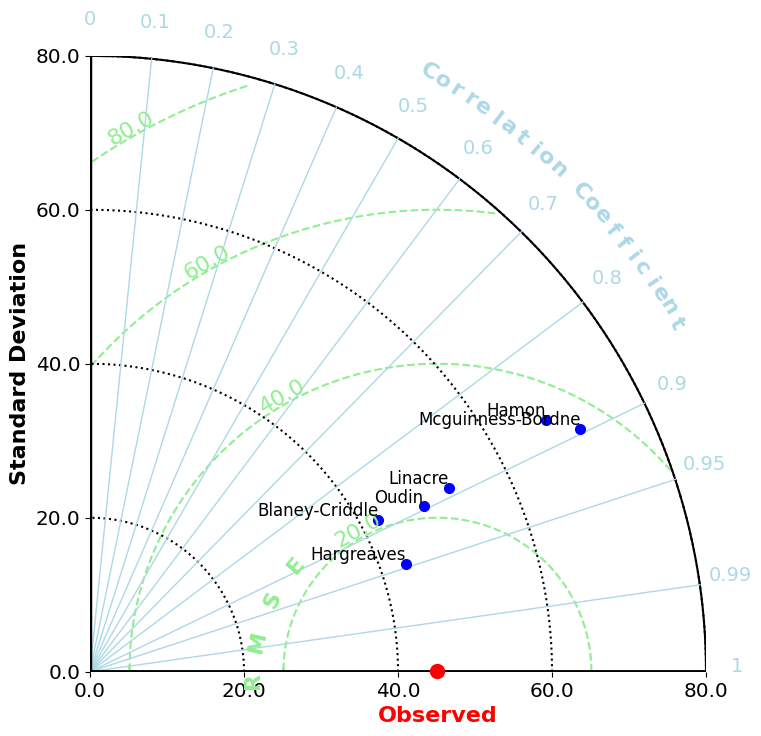

In [30]:
model_names = ['Blaney-Criddle', 'Hamon', 'Linacre', 'Mcguinness-Bordne', 'Hargreaves', 'Oudin']
stddevs = []
correlations = []
rmses = []
std_obss = []

for model in model_names:
    valid_data = df[['FAO-56', f"{model}"]].dropna()
    observed = valid_data['FAO-56'].values
    modeled = valid_data[f"{model}"].values

    std_model = np.std(modeled)
    std_obs = np.std(observed)
    cor = np.corrcoef(observed, modeled)[0, 1]
    # rmse = np.sqrt(std_model**2 + std_obs**2 - 2 * std_model * std_obs * cor)
    rmse = np.sqrt(np.mean((observed - modeled) ** 2))
    
    stddevs.append(std_model)
    correlations.append(cor)
    rmses.append(rmse)
    std_obss.append(std_obs)

    
stddevs.insert(0, np.std(df[['FAO-56']].dropna()).values[0])
rmses.insert(0, 0)
correlations.insert(0, 1)

stddevs = np.array(stddevs)
correlations = np.array(correlations)
rmses = np.array(rmses)
std_obss = np.array(std_obss)

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8, 8))
sm.taylor_diagram(
    stddevs, rmses, correlations,
    markerdisplayed='marker',
    markerLabel=['Observed'] + model_names,
    markerColor='blue',
    markerSize=14,
    colCOR='lightblue',
    colrms='lightgreen',
    colstd='black',
    styleCOR='-',
    widthCOR=1,
    titleOBS='Observed',
    # styleOBS='-',
    colOBS='red',
    labelrms="RMSE",
    markerobs = 'o'
)
# plt.legend(loc="upper right")
plt.show()

In [38]:
df = monthly_daily_data_selected.dropna(subset=["Hargreaves"])
df = df.query("year >= 2005 and year <= 2024")
df.groupby(by=['region_id', 'region_name', 'station_id', 'station_name']).count().sort_values(by=["year"], ascending=False)

year  month  lat  \
region_id region_name station_id station_name                                   
MASA      Mazandaran  40759      Sari                         240    240  240   
                      40735      Siahbisheh                   240    240  240   
                      99360      Polsefid                     240    240  240   
                      99309      Amol                         240    240  240   
                      99306      Bandar-E-Amirabad            240    240  240   
                      99299      Galugah                      240    240  240   
                      40760      Kiyasar                      240    240  240   
                      40737      Gharakhil                    240    240  240   
                      40736      Babolsar                     240    240  240   
                      99361      Alasht                       240    240  240   
                      40734      Nowshahr                     240    240  240   
                      40732      Ramsar                       240    240  240   
                      40788      Sari (Dasht-E-Naz Airport)   228    228  228   
                      99348      Kojur                        226    226  226   
                      99357      Baladeh                      226    226  226   
                      99308      Izad Shahr                    56     56   56   
                      99340      Rineh                         48     48   48   
                      18488      Shayadehband Pay              24     24   24   
                      18420      Babolkenar                    24     24   24   
                      18410      Kelardasht                    24     24   24   
                      18389      Bisheh Bone                   24     24   24   
                      18332      Tonekabon                     24     24   24   
                      18423      Dalir                         15     15   15   
                      18377      Jouybar                       14     14   14   

                                                             lon  \
region_id region_name station_id station_name                      
MASA      Mazandaran  40759      Sari                        240   
                      40735      Siahbisheh                  240   
                      99360      Polsefid                    240   
                      99309      Amol                        240   
                      99306      Bandar-E-Amirabad           240   
                      99299      Galugah                     240   
                      40760      Kiyasar                     240   
                      40737      Gharakhil                   240   
                      40736      Babolsar                    240   
                      99361      Alasht                      240   
                      40734      Nowshahr                    240   
                      40732      Ramsar                      240   
                      40788      Sari (Dasht-E-Naz Airport)  228   
                      99348      Kojur                       226   
                      99357      Baladeh                     226   
                      99308      Izad Shahr                   56   
                      99340      Rineh                        48   
                      18488      Shayadehband Pay             24   
                      18420      Babolkenar                   24   
                      18410      Kelardasht                   24   
                      18389      Bisheh Bone                  24   
                      18332      Tonekabon                    24   
                      18423      Dalir                        15   
                      18377      Jouybar                      14   

                                                             station_elevation  \
region_id region_name station_id station_name                                    
MASA      Mazandaran 